In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount ('/content/drive/')

Mounted at /content/drive/


In [ ]:
train_directory = "/content/drive/MyDrive/Thesis Dataset/train"
test_directory = "/content/drive/MyDrive/Thesis Dataset/test"
validation_directory = "/content/drive/MyDrive/Thesis Dataset/validation"

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Thesis SavedModels/ResNext50/ResNeXt50-0.9956896305084229.h5')

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla P100-PCIE-16GB, compute capability 6.0
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


/usr/local/lib/python3.7/dist-packages/keras/layers/core/lambda_layer.py:305: UserWarning: classification_models.models._common_blocks is not loaded, but a Lambda layer uses it. It may cause errors.
  'function_type')


In [ ]:
pip install lime

     |████████████████████████████████| 275 kB 3.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=4e02076f3819269d840da754c851fd8ae78390db29ec08d8cce793fa1b177d10
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
pip install scikit-image

In [83]:
base = "/content/drive/MyDrive/Thesis Dataset/train/"

ADI_image  = base + "ADI/ADI-AAAMHQMK.tif"
ADI_image  = base + "ADI/ADI-MHNIFYRP.tif"

BACK_image = base + "BACK/BACK-AAAFSKDP.tif"
BACK_image = base + "BACK/BACK-IVPAKFVK.tif"

DEB_image  = base + "DEB/DEB-AAAPHWDG.tif"
LYM_image  = base + "LYM/LYM-AAALPRRV.tif"
MUC_image  = base + "MUC/MUC-AAACASNV.tif"
MUS_image  = base + "MUS/MUS-AADGLEEQ.tif"
NORM_image = base + "NORM/NORM-AAAKGLVQ.tif"
STR_image  = base + "STR/STR-AADLAKYL.tif"
TUM_image  = base + "TUM/TUM-AAALPREY.tif"

In [84]:
import skimage
from tensorflow.keras.preprocessing import image

def read_and_transform_img(url):

    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (100,100))
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    return img

In [85]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

def xAI(model,img_dir):
  images = read_and_transform_img(img_dir)
  explainer = lime_image.LimeImageExplainer()
  explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                          top_labels=3, hide_color=0, num_samples=1000)
  temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
  temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
  ax1.imshow(mark_boundaries(temp_1, mask_1))
  ax2.imshow(mark_boundaries(temp_2, mask_2))
  ax1.axis('off')
  ax2.axis('off')

  0%|          | 0/1000 [00:00<?, ?it/s]

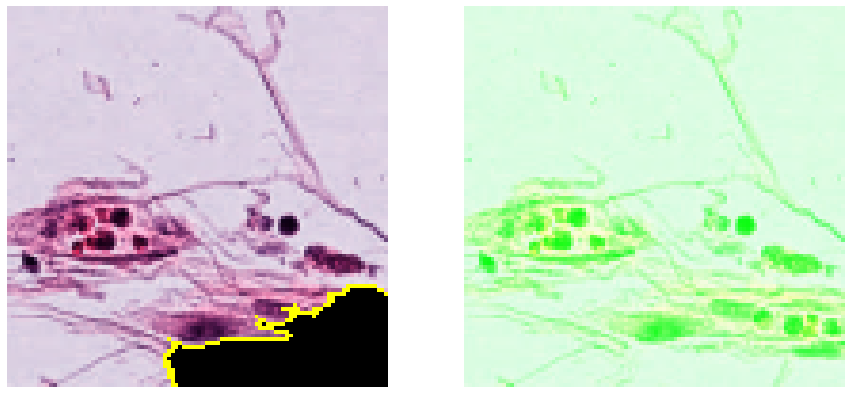

In [ ]:
xAI(model, ADI_image)

  0%|          | 0/1000 [00:00<?, ?it/s]

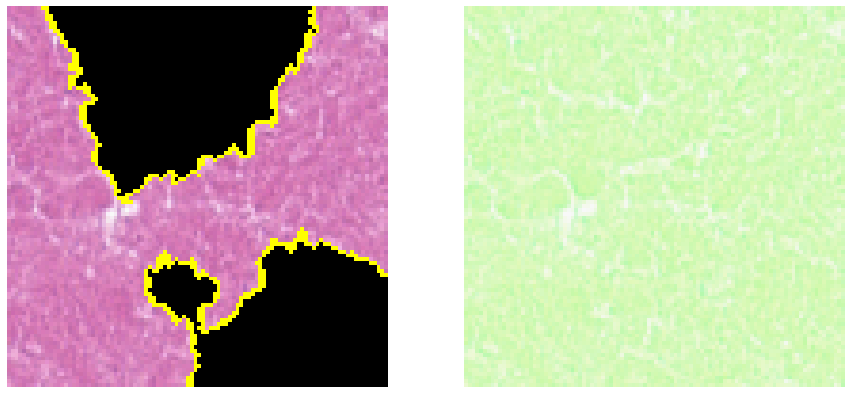

In [ ]:
xAI(model, DEB_image)

  0%|          | 0/1000 [00:00<?, ?it/s]

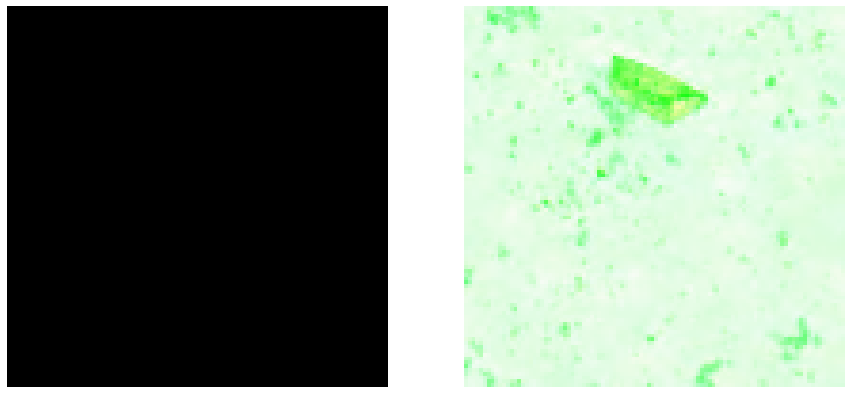

In [86]:
xAI(model, BACK_image)

/content/drive/MyDrive/Thesis Dataset/train/LYM/LYM-AAALPRRV.tif


  0%|          | 0/1000 [00:00<?, ?it/s]

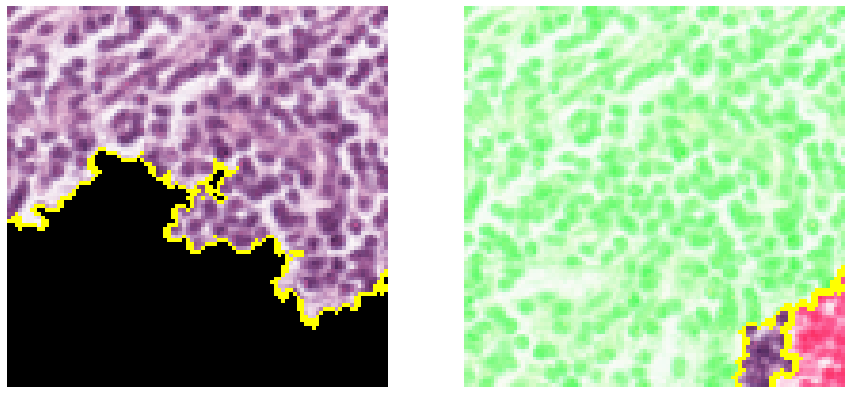

In [ ]:
print(LYM_image)
xAI(model, LYM_image)

  0%|          | 0/1000 [00:00<?, ?it/s]

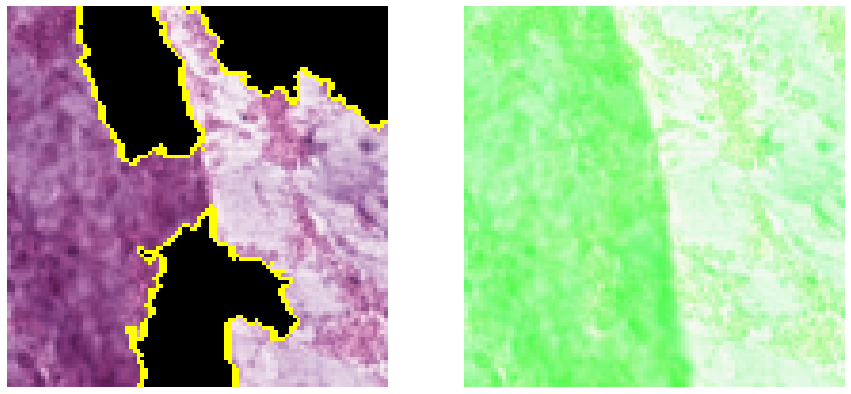

In [ ]:
xAI(model, MUC_image)

  0%|          | 0/1000 [00:00<?, ?it/s]

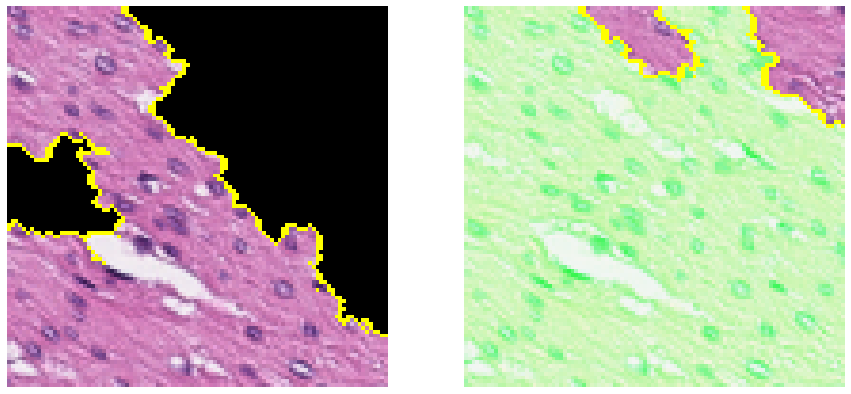

In [ ]:
xAI(model, MUS_image)

  0%|          | 0/1000 [00:00<?, ?it/s]

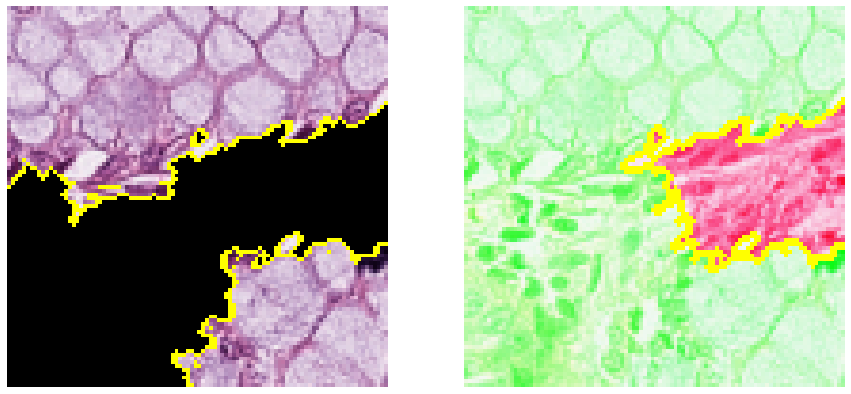

In [ ]:
xAI(model, NORM_image)

  0%|          | 0/1000 [00:00<?, ?it/s]

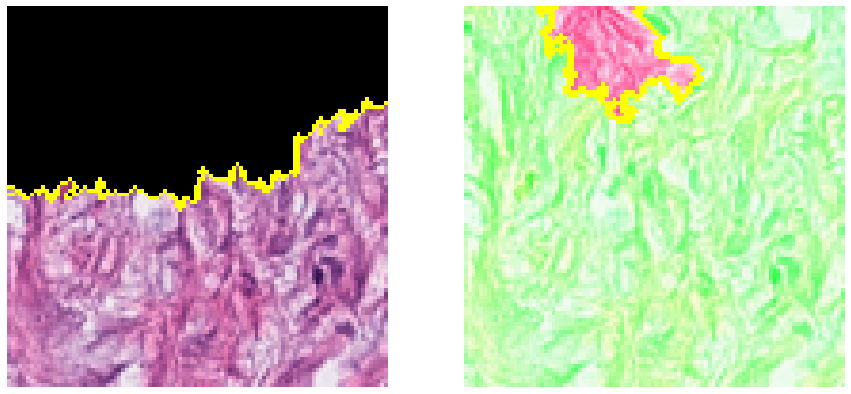

In [ ]:
xAI(model, STR_image)

  0%|          | 0/1000 [00:00<?, ?it/s]

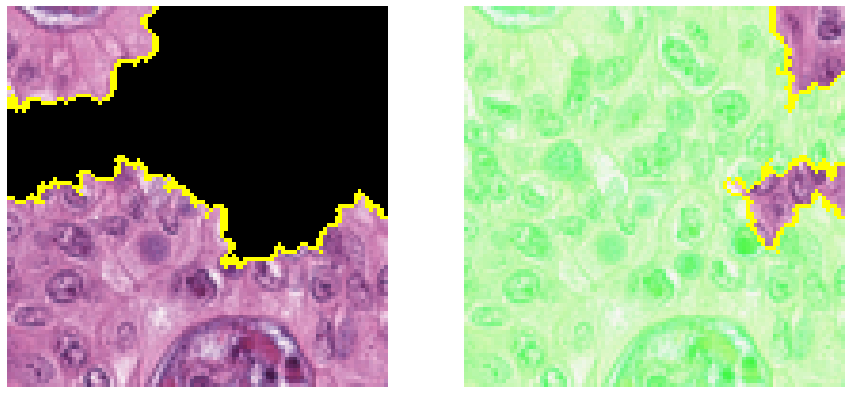

In [ ]:
xAI(model, TUM_image)